NEXT WORD PREDICTOR

name-Vineeth Mallavarapu 

1) Model can be used to predict the next word on the keyboard based on the previous typed words.
2) Python libraries like matplotlib, re, numpy, nltk, pandas, nltk.tokenize etc were used to create this laguage model
3) N-Gram models were used to predict the next word
4) An INDIC TELUGU CORPUS containing of 6100 sentences and 75151 words was used to train the model

In [27]:
import nltk
import nltk.corpus
import nltk.tokenize
import nltk.data
%config Completer.use_jedi = False
import re
import string
from os import getcwd
from nltk.tokenize import word_tokenize
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import shuffle#for shuffling


In [28]:
# read corpus
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

corpus_root = '/Users/jt/Documents/Python/CRspeeches'
speeches = PlaintextCorpusReader("C:/Users/vinee/Desktop/3 - 1/nlp/nlp ass1/corpus(telugu-indic).txt", '*.txt')
speeches.raw('C:/Users/vinee/Desktop/3 - 1/nlp/nlp ass1/corpus(telugu-indic).txt')

'కానీ ప్రభాస్, శ్రద్ధ మధ్య మంచి బాండింగ్ క్రియేట్ అయింది.\r\nఒక ధ్యాన క్రమశిక్షణగా, మనము తినడానికి ముందు భక్తితో దేవునికి మా ఆహారాన్ని అందించగలము, ఆహారాన్ని సంపాదించడంలో కర్మలో చిక్కుకున్నది కాదు, కానీ ఇచ్చిన ఆహారాన్ని తినడం ద్వారా మేము ఆధ్యాత్మిక పురోగతిని పొందవచ్చు.\r\nచంద్రుడు తన కాంతిని సూర్యుని నుండి స్వీకరించాడు అని చెప్పాడు.\r\nమనోజ్ఞతను కలిగిన ఉత్పత్తులు ఒక అయస్కాంతం వంటి స్త్రీలను ఆకర్షిస్తాయి.\r\nఇండియన్ ఎయిర్ లైన్స్\u200cలో ఇలా హిందూజాలు\r\nబిజెపి దాని సైద్ధాంతిక గురువు ఆరెస్సెస్\u200c దిశానిర్ధేశంలో లౌకిక భారతాన్ని హిందూ రాష్ట్రంగా మార్చాలని యత్నిస్తోందని దుయ్యబట్టారు.\r\nఫిరోజ్\u200c షా కోట్ల మైదానంలో ఢిల్లీ క్యాపిటల్స్\u200cతో జరిగిన మ్యాచ్\u200cలో ఐదు వికెట్ల తేడాతో. . . ఉప్పల్\u200cలో పరుగుల సునామీ.\r\nగత రెండుమూడు నెలలుగా \xa0పెట్రోల్, డీజిల్ రేట్ల పెరుగుదలపై దేశవ్యాప్తంగా నిరసనలు వెల్లువెత్తుతున్న తరుణంలో కేంద్ర దిగివచ్చి కాస్త ఊరట కలిగించింది.\r\nసహజంగానే, మీరు మంచి, ఆ, మంచి పాత్రలు గణాంకాలు నియంత్రణ మరియు వ్యతిరేక నాయకులు వ్యతిరేకంగా పోరాడకుండా ఒక శక్తిగా ఆడుతుందో.\

OPEN CORPUS as string

In [29]:
with open('C:/Users/vinee/Desktop/3 - 1/nlp/nlp ass1/corpus(telugu-indic).txt', 'r',encoding="utf8") as mainfile:
    string = mainfile.read()

NORMALIZING TEXT

In [30]:
def process_telugu_text(text):
  nltk_token_imp = text.replace(',','')
  nltk_token_imp = nltk_token_imp.replace('.','')
  nltk_token_imp = nltk_token_imp.replace(';','')
  nltk_token_imp = nltk_token_imp.replace(':','')
  for ele in nltk_token_imp:
    if ele.isdigit():
        nltk_token_imp = nltk_token_imp.replace(ele,'')
  nltk_tokens = nltk.word_tokenize(nltk_token_imp)

  return(nltk_tokens)

SEGMENTATION

In [31]:
sentences=string.split(u"।")

In [32]:
#print first 30 sentences
print(sentences[:30])

['కానీ ప్రభాస్, శ్రద్ధ మధ్య మంచి బాండింగ్ క్రియేట్ అయింది.\nఒక ధ్యాన క్రమశిక్షణగా, మనము తినడానికి ముందు భక్తితో దేవునికి మా ఆహారాన్ని అందించగలము, ఆహారాన్ని సంపాదించడంలో కర్మలో చిక్కుకున్నది కాదు, కానీ ఇచ్చిన ఆహారాన్ని తినడం ద్వారా మేము ఆధ్యాత్మిక పురోగతిని పొందవచ్చు.\nచంద్రుడు తన కాంతిని సూర్యుని నుండి స్వీకరించాడు అని చెప్పాడు.\nమనోజ్ఞతను కలిగిన ఉత్పత్తులు ఒక అయస్కాంతం వంటి స్త్రీలను ఆకర్షిస్తాయి.\nఇండియన్ ఎయిర్ లైన్స్\u200cలో ఇలా హిందూజాలు\nబిజెపి దాని సైద్ధాంతిక గురువు ఆరెస్సెస్\u200c దిశానిర్ధేశంలో లౌకిక భారతాన్ని హిందూ రాష్ట్రంగా మార్చాలని యత్నిస్తోందని దుయ్యబట్టారు.\nఫిరోజ్\u200c షా కోట్ల మైదానంలో ఢిల్లీ క్యాపిటల్స్\u200cతో జరిగిన మ్యాచ్\u200cలో ఐదు వికెట్ల తేడాతో. . . ఉప్పల్\u200cలో పరుగుల సునామీ.\nగత రెండుమూడు నెలలుగా \xa0పెట్రోల్, డీజిల్ రేట్ల పెరుగుదలపై దేశవ్యాప్తంగా నిరసనలు వెల్లువెత్తుతున్న తరుణంలో కేంద్ర దిగివచ్చి కాస్త ఊరట కలిగించింది.\nసహజంగానే, మీరు మంచి, ఆ, మంచి పాత్రలు గణాంకాలు నియంత్రణ మరియు వ్యతిరేక నాయకులు వ్యతిరేకంగా పోరాడకుండా ఒక శక్తిగా ఆడుతుందో.\nటాక్సిక్ ఔషధ-ప

CREATING TOKEN ARRAY

In [33]:
from re import X

with open('C:/Users/vinee/Desktop//3 - 1/nlp/nlp ass1/corpus(telugu-indic).txt', 'r',encoding="utf8") as mainfile:
    string = mainfile.read()
string.split() 


['కానీ',
 'ప్రభాస్,',
 'శ్రద్ధ',
 'మధ్య',
 'మంచి',
 'బాండింగ్',
 'క్రియేట్',
 'అయింది.',
 'ఒక',
 'ధ్యాన',
 'క్రమశిక్షణగా,',
 'మనము',
 'తినడానికి',
 'ముందు',
 'భక్తితో',
 'దేవునికి',
 'మా',
 'ఆహారాన్ని',
 'అందించగలము,',
 'ఆహారాన్ని',
 'సంపాదించడంలో',
 'కర్మలో',
 'చిక్కుకున్నది',
 'కాదు,',
 'కానీ',
 'ఇచ్చిన',
 'ఆహారాన్ని',
 'తినడం',
 'ద్వారా',
 'మేము',
 'ఆధ్యాత్మిక',
 'పురోగతిని',
 'పొందవచ్చు.',
 'చంద్రుడు',
 'తన',
 'కాంతిని',
 'సూర్యుని',
 'నుండి',
 'స్వీకరించాడు',
 'అని',
 'చెప్పాడు.',
 'మనోజ్ఞతను',
 'కలిగిన',
 'ఉత్పత్తులు',
 'ఒక',
 'అయస్కాంతం',
 'వంటి',
 'స్త్రీలను',
 'ఆకర్షిస్తాయి.',
 'ఇండియన్',
 'ఎయిర్',
 'లైన్స్\u200cలో',
 'ఇలా',
 'హిందూజాలు',
 'బిజెపి',
 'దాని',
 'సైద్ధాంతిక',
 'గురువు',
 'ఆరెస్సెస్\u200c',
 'దిశానిర్ధేశంలో',
 'లౌకిక',
 'భారతాన్ని',
 'హిందూ',
 'రాష్ట్రంగా',
 'మార్చాలని',
 'యత్నిస్తోందని',
 'దుయ్యబట్టారు.',
 'ఫిరోజ్\u200c',
 'షా',
 'కోట్ల',
 'మైదానంలో',
 'ఢిల్లీ',
 'క్యాపిటల్స్\u200cతో',
 'జరిగిన',
 'మ్యాచ్\u200cలో',
 'ఐదు',
 'వికెట్ల',
 'తేడాతో.',
 '.',
 '.',
 'ఉప

FREQUENCY ARRAY FROM TOKENS

In [34]:
def build_freq(arr):
  frequency = {}
  for item in arr:
     if item in frequency:
        frequency[item] += 1
     else:
        frequency[item] = 1
  return(frequency)
freq_dict = build_freq(string.split())
#print(freq_dict)
print(len(freq_dict))

31083


HEAP'S LAW

In [35]:
import pandas as pd
corpusSize = 0
uniqueTokens = set()
j = 0
dic = {}
for word in string.split():
    uniqueTokens.add(word)
    corpusSize += 1
    dic[j] = {"Corpus Size": corpusSize, "Unique Tokens": len(uniqueTokens)}
    j = j+1

Vcount_DF =  pd.DataFrame.from_dict(dic, "index")

In [36]:
Vcount_DF.iloc[:,1]

0            1
1            2
2            3
3            4
4            5
         ...  
75147    31082
75148    31083
75149    31083
75150    31083
75151    31083
Name: Unique Tokens, Length: 75152, dtype: int64

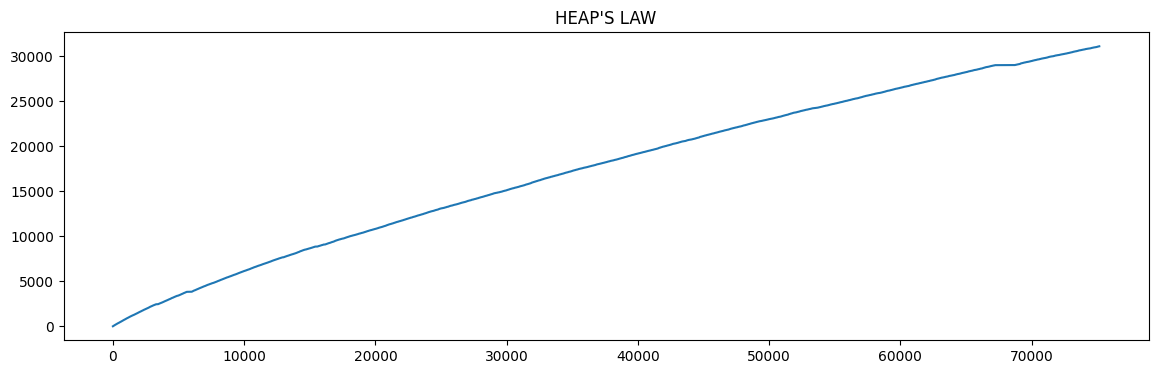

In [37]:
import matplotlib.pyplot as plt     #HEAPS LAW!!!!
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 4]
plt.title("HEAP'S LAW")
plt.plot(Vcount_DF.iloc[:,0], Vcount_DF.iloc[:,1])

In [38]:
from collections import Counter
from nltk.util import ngrams
from nltk.probability import FreqDist 

NUMBER OF DISTINCT UNIGRAMS

In [39]:
inputFD = FreqDist(string.split())
print("unique unigrams in my corpus-", len(inputFD))

unique unigrams in my corpus- 31083


CHECKING ZIPF'S LAW

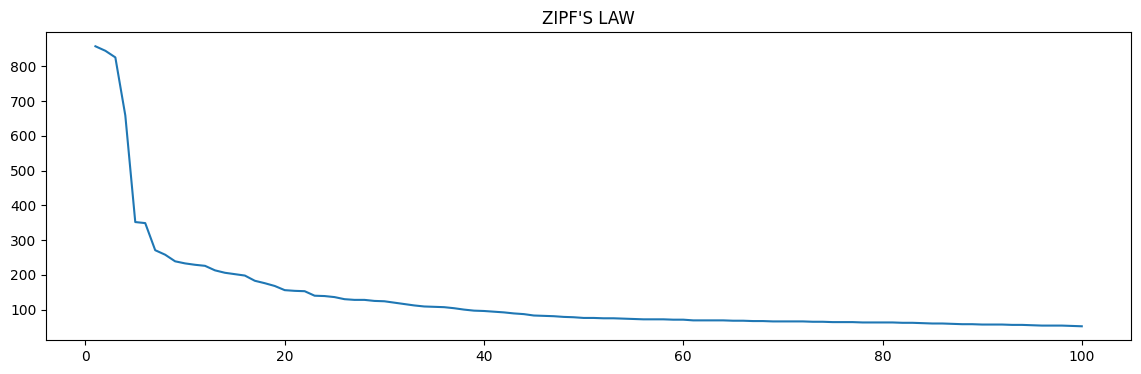

In [40]:
#Rank and zipf's law graph :-
sorted_freq_dict={k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1],reverse=True)}
names = list(sorted_freq_dict.keys()) # as the dictionary is sorted the ranks are given as the numeric ascending order.
values = list(sorted_freq_dict.values())
X_axis = []
for i in range(0,100):
  X_axis.append(i+1)
Y_axis = []
for j in range(0,100):
  Y_axis.append(values[j])
plt.plot(X_axis,Y_axis)
plt.rcParams['figure.figsize'] = [14, 7]
plt.title("ZIPF'S LAW")
plt.show()

FINDING BEST COLLOCATIONS IN CORPUS

In [41]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
def most_cmn(token):
  word_fd = nltk.FreqDist(token)
  bigram_fd = nltk.FreqDist(nltk.bigrams(token))
  return (bigram_fd.most_common())
Bigram_cmn = most_cmn(string.split())
for i in range(0,50):
  print(Bigram_cmn[i])

(('.', '.'), 251)
(('ఈ', 'సినిమా'), 29)
(('ఈ', 'సందర్భంగా'), 26)
(('ఆ', 'తర్వాత'), 25)
(('ఈ', 'నెల'), 22)
(('ఈ', 'చిత్రం'), 21)
(('మరియు', 'ఒక'), 20)
(('మీరు', 'ఒక'), 19)
(('ఒక', 'చిన్న'), 18)
(('కంటే', 'ఎక్కువ'), 18)
(('/', 'src'), 17)
(('src', '/'), 17)
(('అయితే', 'ఈ'), 16)
(('మరియు', 'దాని'), 15)
(('-', 'ఒక'), 15)
(('వ్యక్తం', 'చేశారు.'), 15)
(('సంగతి', 'తెలిసిందే.'), 15)
(('పవన్', 'కళ్యాణ్'), 14)
(('యొక్క', 'ఒక'), 14)
(('కలిగి', 'ఉంది.'), 14)
(('లేదా', 'ఒక'), 14)
(('మాట్లాడుతూ.', '.'), 13)
(('ఈ', 'విషయంలో'), 13)
(('మరియు', 'మీరు'), 13)
(('.', 'ఈ'), 13)
(('విషయం', 'తెలిసిందే.'), 13)
(('మీరు', 'మీ'), 13)
(('మరియు', 'ఇతర'), 12)
(('ఇది', 'ఒక'), 12)
(('ఒక', 'ప్రత్యేక'), 12)
(('.', '?'), 12)
(('బైట్లు)angular-okta-example', '/'), 12)
(('-', 'ఇది'), 11)
(('అవకాశం', 'ఉంది.'), 11)
(('సోషల్', 'మీడియాలో'), 11)
(('ఆ', 'తరువాత'), 11)
(('-', 'ఈ'), 11)
(('.', 'ఆ'), 11)
(('ఒక', 'వ్యక్తి'), 11)
(('మరియు', 'మీ'), 11)
(('.', '!'), 11)
(('గత', 'ఏడాది'), 10)
(('అది', 'ఒక'), 10)
(('ఈ', 'విషయం'), 10)
(('

In [42]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

In [43]:
bigram_fd = nltk.FreqDist(nltk.bigrams(string.split()))


In [44]:
biagram_collocation = BigramCollocationFinder.from_words(string.split())
Bigrams_corpus = biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio,100000000)
print(len(Bigrams_corpus))

68535


('.', '.')
('/', 'src')
('src', '/')
('సంగతి', 'తెలిసిందే.')
('కంటే', 'ఎక్కువ')
('పవన్', 'కళ్యాణ్')
('ఈ', 'సందర్భంగా')
('సోషల్', 'మీడియాలో')
('బైట్లు)angular-okta-example', '/')
('ఆ', 'తర్వాత')
('ఈ', 'నెల')
('వ్యక్తం', 'చేశారు.')
('నియమం', 'వలె,')
('విషయం', 'తెలిసిందే.')
('/', 'app')
('టి', 'అర్')
('కేసు', 'నమోదు')
('ఇప్పటి', 'వరకు')
('ఈ', 'సినిమా')
('ఎన్', 'టి')
('పెద్ద', 'ఎత్తున')
('రామ్', 'చరణ్')
('బైట్లు)కోణీయ-ఓకటా-ఉదాహరణకు', '/')
('గత', 'ఏడాది')
('ఒక', 'చిన్న')
('ను', 'సృష్టించండి.')
('మాట్లాడుతూ.', '.')
('స్పష్టం', 'చేశారు.')
('ఈ', 'చిత్రం')
('మహేష్', 'బాబు')
('ఆగ్రహం', 'వ్యక్తం')
('పౌరసత్వ', 'సవరణ')
('అల్లు', 'అర్జున్')
('ప్రేక్షకుల', 'ముందుకు')
('ప్రధాని', 'నరేంద్ర')
('విజయ్', 'దేవరకొండ.')
('కలిగి', 'ఉంది.')
('రాహుల్', 'గాంధీ')
('బిగ్', 'బాస్')
('నిరాశే', 'మిగిలింది.')
('అంచనా', 'వేస్తున్నారు.')
('నరేంద్ర', 'మోదీ')
('ఏర్పాటు', 'చేసిన')
('కౌంటీ', 'జైలులో')
('బైట్లు)కోణీయ-', 'okta-')
('ఆసుపత్రికి', 'తరలించారు.')
('వీడియో', 'చాట్')
('‘వరల్డ్', 'ఫేమస్')
('అధిక', 'సంఖ్యలో')
('ప్రత్య

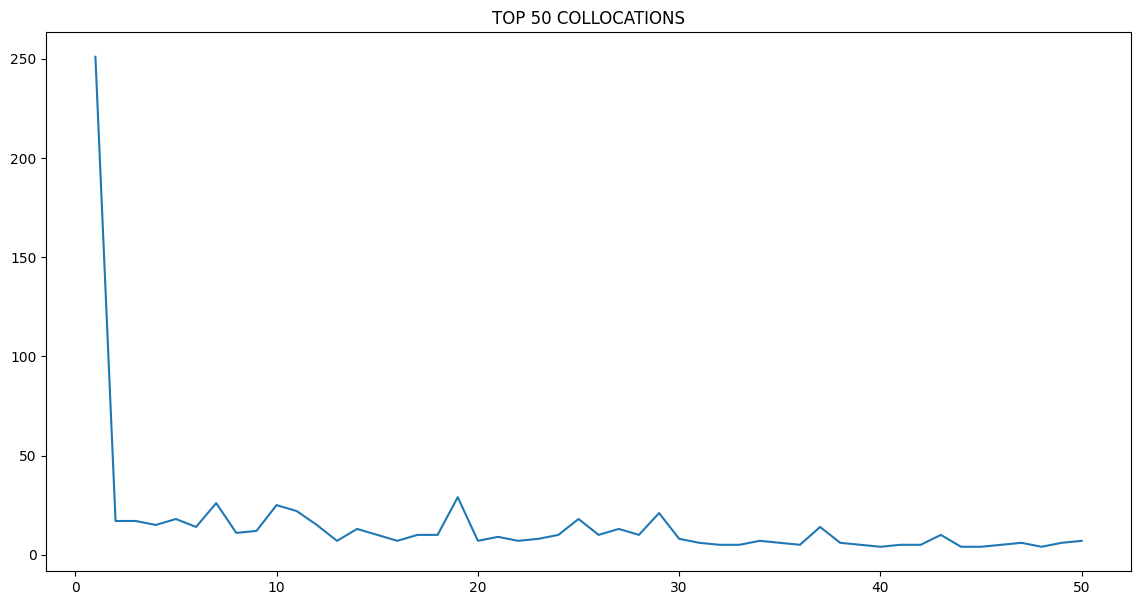

In [45]:
for i in range(50):
  print(Bigrams_corpus[i])
for i in range(50):
  print(bigram_fd[Bigrams_corpus[i][0],Bigrams_corpus[i][1]])
x_axs = []
for i in range(1,51):
  x_axs.append(i)
y_axs = []
for i in range(50):
  y_axs.append(bigram_fd[Bigrams_corpus[i][0],Bigrams_corpus[i][1]])
plt.title("TOP 50 COLLOCATIONS")
plt.plot(x_axs,y_axs)

N-gram tokens and frequency

number of bigrams

In [46]:
bigrams = nltk.bigrams(string.split())
frequence = nltk.FreqDist(bigrams)
arr = [[]]
for value in frequence.items():
    arr.append(value)
print("NUMBER OF UNIQUE BIGRAMS ARE :- ")
print(len(arr))

NUMBER OF UNIQUE BIGRAMS ARE :- 
68536


number of trigrams and creating frequency dictionary of trigrams

In [47]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
def most_cmn_Trigram(token):
  word_fd = nltk.FreqDist(token)
  trigram_fd = nltk.FreqDist(nltk.trigrams(token))
  return (trigram_fd.most_common())
Trigram_cmn = most_cmn_Trigram(string.split())
for i in range(0,50):
  print(Trigram_cmn[i])

(('.', '.', '.'), 48)
(('/', 'src', '/'), 17)
(('ఒక', 'నియమం', 'వలె,'), 7)
(('బైట్లు)కోణీయ-ఓకటా-ఉదాహరణకు', '/', 'src'), 7)
(('బైట్లు)angular-okta-example', '/', 'src'), 7)
(('ఎన్', 'టి', 'అర్'), 7)
(('ఈ', 'సందర్భంగా', 'ఆయన'), 6)
(('సందర్భంగా', 'ఆయన', 'మాట్లాడుతూ'), 5)
(('.', '.', 'ఈ'), 5)
(('src', '/', 'app'), 5)
(('/', 'app', '/'), 5)
(('app', '/', 'app'), 5)
(('/', 'app', 'ను'), 5)
(('app', 'ను', 'సృష్టించండి.'), 5)
(('చాలా', 'తరచుగా,', 'ఈ'), 4)
(('ఆవేదన', 'వ్యక్తం', 'చేశారు.'), 4)
(('.', '.', 'ఆ'), 4)
(('మరియు', '/', 'లేదా'), 4)
(('ప్రధాని', 'నరేంద్ర', 'మోదీ'), 4)
(('ఆగ్రహం', 'వ్యక్తం', 'చేశారు.'), 4)
(('బైట్లు)కోణీయ-', 'okta-', 'ఉదాహరణకు'), 4)
(('okta-', 'ఉదాహరణకు', '/'), 4)
(('ను', 'సృష్టించండి.', 'భాగం.'), 4)
(('ఆయన', 'మాట్లాడుతూ.', '.'), 4)
(('దివంగత', 'ముఖ్యమంత్రి', 'వైఎస్\u200c'), 4)
(('ముఖ్యమంత్రి', 'వైఎస్\u200c', 'రాజశేఖరరెడ్డి'), 4)
(('విజయ్', 'దేవరకొండ.', '.'), 4)
(('భరత్', 'అనే', 'నేను'), 3)
(('ఈ', 'చిత్రానికి', 'సంగీతం:'), 3)
(('కథ,', 'స్క్రీన్\u200cప్లే,', 'దర్శకత్వం:')

In [48]:
trigram_fd = nltk.FreqDist(nltk.trigrams(string.split()))

NUMBER OF UNIQUE TRIGRAMS

In [49]:
print("NUMBER OF UNIQUE TRIGRAMS ARE :-")
print(len(Trigram_cmn))

NUMBER OF UNIQUE TRIGRAMS ARE :-
72401


In [50]:
output = list(ngrams(string.split(),4))
print(output[10])
print(len(output))

('క్రమశిక్షణగా,', 'మనము', 'తినడానికి', 'ముందు')
75149


NUMBER OF 4-GRAMS and CREATING FREQUENCY DICTIONARY OF 4-GRAMS

In [51]:
def most_cmn_Fourgram(token):
  word_fd = nltk.FreqDist(token)
  fourgram_fd = nltk.FreqDist(nltk.ngrams(token,4))
  return (fourgram_fd.most_common())
Fourgram_cmn = most_cmn_Fourgram(string.split())
for i in range(0,50):
  print(Fourgram_cmn[i])


(('.', '.', '.', '.'), 8)
(('బైట్లు)కోణీయ-ఓకటా-ఉదాహరణకు', '/', 'src', '/'), 7)
(('బైట్లు)angular-okta-example', '/', 'src', '/'), 7)
(('ఈ', 'సందర్భంగా', 'ఆయన', 'మాట్లాడుతూ'), 5)
(('/', 'src', '/', 'app'), 5)
(('src', '/', 'app', '/'), 5)
(('/', 'app', '/', 'app'), 5)
(('app', '/', 'app', 'ను'), 5)
(('/', 'app', 'ను', 'సృష్టించండి.'), 5)
(('బైట్లు)కోణీయ-', 'okta-', 'ఉదాహరణకు', '/'), 4)
(('app', 'ను', 'సృష్టించండి.', 'భాగం.'), 4)
(('దివంగత', 'ముఖ్యమంత్రి', 'వైఎస్\u200c', 'రాజశేఖరరెడ్డి'), 4)
(('పౌరసత్వ', 'సవరణ', 'చట్టానికి', 'వ్యతిరేకంగా'), 3)
(('Home', '»', 'తాజా', 'వార్తలు'), 3)
(('»', 'తాజా', 'వార్తలు', '»'), 3)
(('/', 'tsconfig', 'ను', 'సృష్టించండి.'), 3)
(('నావికులు', 'మొదట', 'స్పానిష్', 'నౌకల్లో'), 3)
(('మొదట', 'స్పానిష్', 'నౌకల్లో', 'వచ్చిన'), 3)
(('స్పానిష్', 'నౌకల్లో', 'వచ్చిన', 'తర్వాత'), 3)
(('నౌకల్లో', 'వచ్చిన', 'తర్వాత', 'వారు'), 3)
(('వచ్చిన', 'తర్వాత', 'వారు', 'టియెర్రా'), 3)
(('తర్వాత', 'వారు', 'టియెర్రా', 'డెల్'), 3)
(('వారు', 'టియెర్రా', 'డెల్', 'ఫ్యూగో'), 3)
(('టియెర్ర

NUMBER OF UNIQUE 4-GRAMS

In [52]:
print(len(Fourgram_cmn))

72709


FINDING NUMBER OF 5-GRAMS and creating a FREQUENCY DICTIONARY of 5-GRAMS

In [53]:
def most_cmn_Fivegram(token):
  word_fd = nltk.FreqDist(token)
  fivegram_fd = nltk.FreqDist(nltk.ngrams(token,5))
  return (fivegram_fd.most_common())
Fivegram_cmn = most_cmn_Fivegram(string.split())
for i in range(0,50):
  print(Fivegram_cmn[i])

(('బైట్లు)angular-okta-example', '/', 'src', '/', 'app'), 5)
(('/', 'src', '/', 'app', '/'), 5)
(('src', '/', 'app', '/', 'app'), 5)
(('/', 'app', '/', 'app', 'ను'), 5)
(('app', '/', 'app', 'ను', 'సృష్టించండి.'), 5)
(('/', 'app', 'ను', 'సృష్టించండి.', 'భాగం.'), 4)
(('Home', '»', 'తాజా', 'వార్తలు', '»'), 3)
(('నావికులు', 'మొదట', 'స్పానిష్', 'నౌకల్లో', 'వచ్చిన'), 3)
(('మొదట', 'స్పానిష్', 'నౌకల్లో', 'వచ్చిన', 'తర్వాత'), 3)
(('స్పానిష్', 'నౌకల్లో', 'వచ్చిన', 'తర్వాత', 'వారు'), 3)
(('నౌకల్లో', 'వచ్చిన', 'తర్వాత', 'వారు', 'టియెర్రా'), 3)
(('వచ్చిన', 'తర్వాత', 'వారు', 'టియెర్రా', 'డెల్'), 3)
(('తర్వాత', 'వారు', 'టియెర్రా', 'డెల్', 'ఫ్యూగో'), 3)
(('వారు', 'టియెర్రా', 'డెల్', 'ఫ్యూగో', 'ప్రాంతంలో'), 3)
(('టియెర్రా', 'డెల్', 'ఫ్యూగో', 'ప్రాంతంలో', 'చవిచూశాయి'), 3)
(('డెల్', 'ఫ్యూగో', 'ప్రాంతంలో', 'చవిచూశాయి', 'ప్రయాణ'), 3)
(('ఫ్యూగో', 'ప్రాంతంలో', 'చవిచూశాయి', 'ప్రయాణ', 'కష్టాలను,'), 3)
(('ప్రాంతంలో', 'చవిచూశాయి', 'ప్రయాణ', 'కష్టాలను,', 'మర్చిపోతే'), 3)
(('చవిచూశాయి', 'ప్రయాణ', 'కష్టాలను,', 'మర్

NUMBER OF UNIQUE 5-GRAMS 

In [54]:
print(len(Fivegram_cmn))

72775


CREATING LMs

UNIGRAM LANGUAGE MODELS

In [55]:
import math
def unigramLM(input):
  total_tokens = len(string.split())
  Prob_input = 1 
  for token in nltk.word_tokenize(input):
    count_w = inputFD[token]
    prob = count_w/total_tokens
    Prob_input *= count_w/total_tokens
  return Prob_input

In [56]:
input = ["సూచీ", "నేపథ్యంలో"]     #CHECKING THE UNIGRAM MODEL
for phrase in input:
  print(unigramLM(phrase))

5.3225463061528635e-05
0.0004124973387268469


BIGRAM LANGUAGE MODELS

In [57]:
def bigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-1):
    countBigram = bigram_fd[(token[i], token[i+1])]
    countBase = inputFD[token[i]]
    prob_input *= countBigram/countBase
  return prob_input

In [58]:
input2 = ["రెండు ప్రాథమిక", "ఉపయోగించడం కోసం"]
for phrase in input2:
  print(bigramLM(phrase))

0.015625
1.0


TRIGRAM LANGUAGE MODEL

In [59]:
def trigramLM(input):
  prob_input = 1
  token = nltk.word_tokenize(input)
  for i in range(len(token)-2):
    counttrigram = trigram_fd[(token[i], token[i+1], token[i+2])]
    countBase = bigram_fd[(token[i], token[i+1])]
    prob_input *= counttrigram/countBase
  return prob_input

In [60]:
input3 = ["హిందూజాలు","ఎయిర్", "లైన్స్‌లో ఇలా"]
for phrase in input3:
  print(trigramLM(phrase))

1
1
1


USING WORD PREDICTION
* HERE I USED INTERPLOATION FOR A BETTER WORD PREDICTION AND PROBABILITY INSTEAD OF LAPLACE SMOOTHING .
* MY CODE PREDICTS THE BEST TOP 3 NEXT WORDS FROM MY CORPUS THAT ARE CHOSEN BASED ON UNIGRAM ,BIGRAM AND TRIGRAM LANGUAGE MODELS PRODUCED PROBABILITIES.
* IN INTERPOLATION λ1 , λ2 , λ3 IN THE FORMULA P = P1* λ1 + P2 * λ2 + P3*λ3 where P1 is unigramLM probability, P2 is bigramLM probability , P3 is trigramLM probability
* I CHOSE λ1 = 0.1 , 
* λ2 = 0.4 ,
* λ3 = 0.5

In [61]:
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1],reverse=True)
    return sub_li
def next_word_bi(inp):
  pro_list = []
  tokens = nltk.word_tokenize(inp)
  n = len(tokens)
  for i in range (len(names)):
    list_want = []
    p1 = 0
    p2 = 1
    p1 =unigramLM(names[i])

    countBigram = bigram_fd[(tokens[n- 1], names[i])]
    countBase1 = inputFD[names[i]]
    p2 *= countBigram/countBase1
    trigram_fd= nltk.FreqDist(nltk.trigrams(tokens))
    counttrigram = trigram_fd[(tokens[n-2], tokens[n-1], names[i])]
    countBase2 = bigram_fd[(tokens[n-1], names[i])]
    p3 = 1
    if countBase2 > 0 :
        p3 *= counttrigram/countBase2
    else:
        countBase2 = 1
        p3 *= counttrigram/countBase2 
    p = 0
    p =  0.1*p1+0.4*p2 + 0.5*p3   #INTERPOLATION.
    list_want.append(names[i])
    list_want.append(p)
    pro_list.append(list_want)
  Sort(pro_list)
  print(f"THE TOP 3 NEXT WORD PREDICTIONS BASED ON MY CORPUS ARE {pro_list[0][0]} , {pro_list[1][0]} , {pro_list[2][0]} ")
  print("THE PROBABILITIES ARE AS FOLLOWS :-")
  return pro_list[:3]

DESIRED OUTPUT IS

In [62]:
inp = "సూచీ నేపథ్యంలో"
next_word_bi(inp)


THE TOP 3 NEXT WORD PREDICTIONS BASED ON MY CORPUS ARE బెజవాడలో , చందాకొచర్‌ , దత్తాత్రేయ 
THE PROBABILITIES ARE AS FOLLOWS :-


[['బెజవాడలో', 0.40000133063657656],
 ['చందాకొచర్\u200c', 0.40000133063657656],
 ['దత్తాత్రేయ', 0.40000133063657656]]

MANUAL MODEL CHECKING

In [64]:
bigram_fd[("గత","రెండుమూడు")]

1

In [65]:
inputFD["గత"]

51